#Funcion K-means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

np.random.seed(20)

# Función de K-Means
def KMeans(datos, K, iteraciones):
    # Inicializamos los k-centros de manera aleatoria
    centros = datos[np.random.choice(datos.shape[0], K, replace=False)]
    #print("Estos son mis centros:", centros, "\n")

    for i in range(iteraciones):
        clusters = np.empty(K, dtype=object)
        for p in range(K):
          clusters[p] = []

        # Calculamos la distancia entre los datos y los centros y asignamos a clusters
        for j in range(datos.shape[0]):
            min_distancia = float('inf')
            cluster_asignado = -1
            for l in range(K):
                distancia = np.linalg.norm(datos[j] - centros[l])**2
                #print("La distancia del punto", j, "al centro", l, "es:", distancia)
                if distancia < min_distancia:
                    min_distancia = distancia
                    cluster_asignado = l
            #print("El dato", j, "se guarda en el cluster", cluster_asignado)
            clusters[cluster_asignado].append(datos[j])

        # Actualizamos los centros como promedio de cada cluster
        for l in range(K):
            if len(clusters[l]) > 0:
                centros[l] = np.mean(clusters[l], axis=0)

    return centros, clusters


In [66]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(centros, clusters):
    K = len(centros)

    for i in range(K):
        cluster = clusters[i]
        if len(cluster) > 0:
            cluster = np.array(cluster)
            plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i + 1}')

        centro = np.array(centros[i])
        plt.scatter(centro[0], centro[1], c='red', marker='x', s=100, label=f'Centro {i + 1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters generados por K-Means')

    plt.show()

# Clasificación de puntos

In [67]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn import cluster, datasets, mixture

# Datos sinteticos
X1, _ = make_blobs(n_samples=10000, centers=40, random_state=0)
X2, _ = make_moons(n_samples=2000, noise=0.05, random_state=0)
np.random.seed(7)

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X3 = np.concatenate((x1,x2,x3),axis=0)
X4, _ = make_circles(n_samples=1000, factor=0.5, noise=0.1, random_state=42)

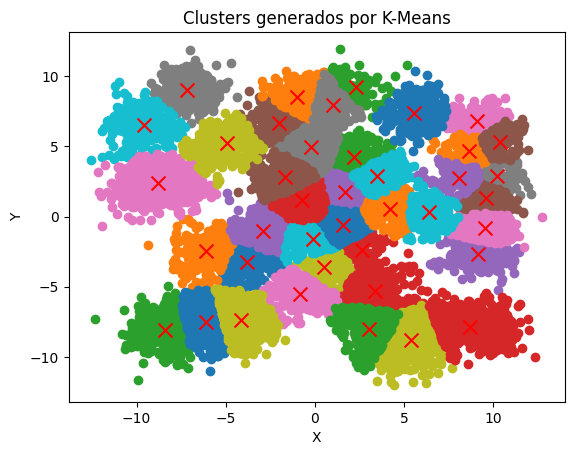

In [68]:
# K-means para cada conjunto de datos
K = 40
centrosX1, clustersX1 = KMeans(X1, K, 10)
plot_clusters(centrosX1, clustersX1)

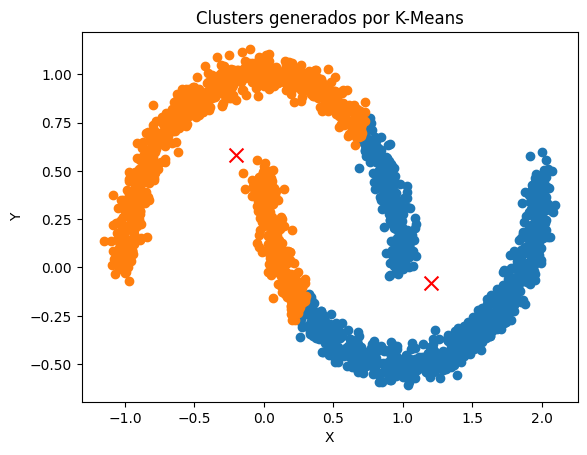

In [69]:
centrosX2, clustersX2 = KMeans(X2, 2, 10)
plot_clusters(centrosX2, clustersX2)

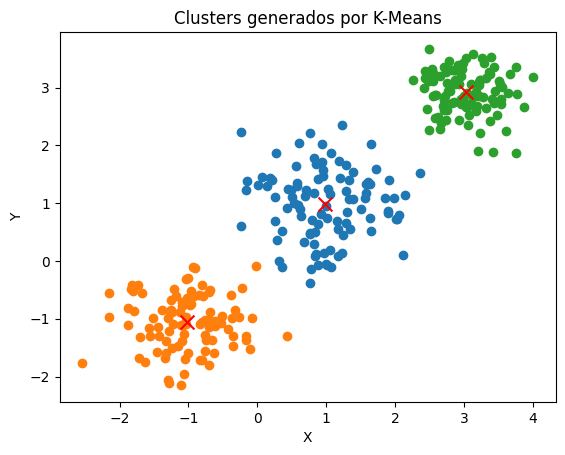

In [70]:
centrosX3, clustersX3 = KMeans(X3, 3, 10)
plot_clusters(centrosX3, clustersX3)

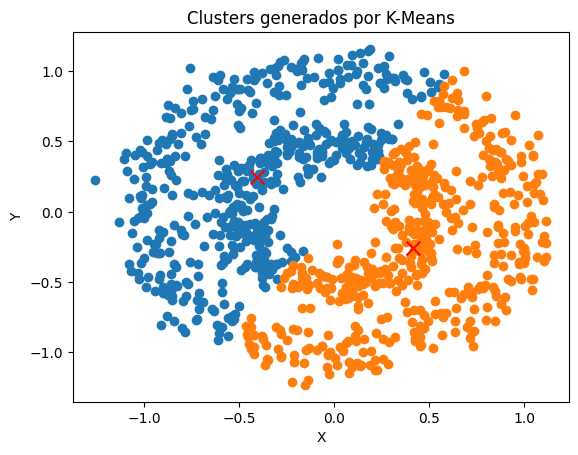

In [71]:
centrosX4, clustersX4 = KMeans(X4, 2, 10)
plot_clusters(centrosX4, clustersX4)

# Clasificación de Números

In [63]:
# Cargamos los datos
from sklearn.datasets import load_digits
import cv2
from google.colab.patches import cv2_imshow

np.random.seed(1)
digits = load_digits()
data = digits.data
data = 255-data

In [89]:
centros_dig, clusters_dig = KMeans(data, 10, 1000)

Clúster 0
181 elementos


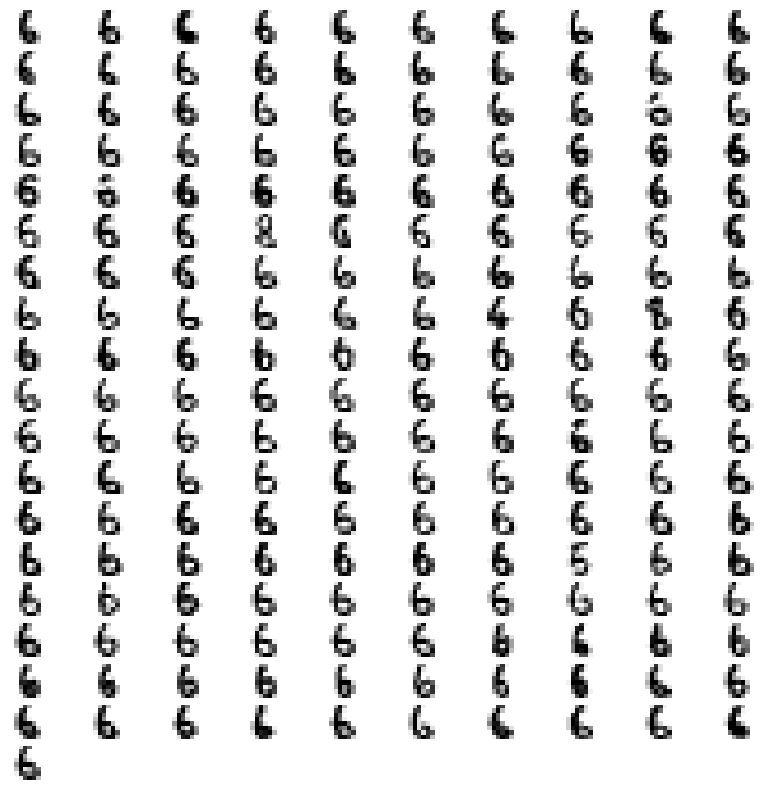

Clúster 1
259 elementos


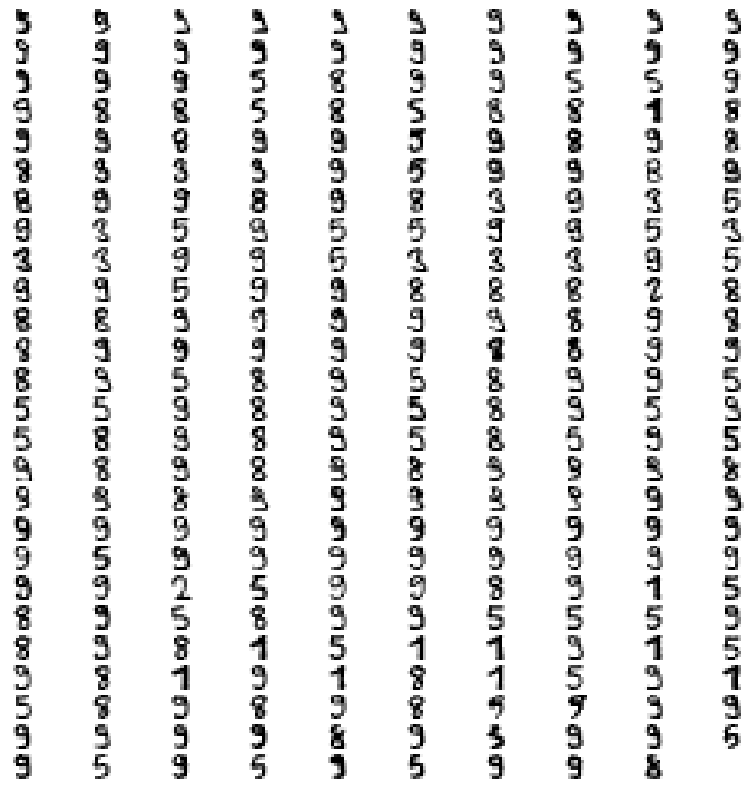

Clúster 2
230 elementos


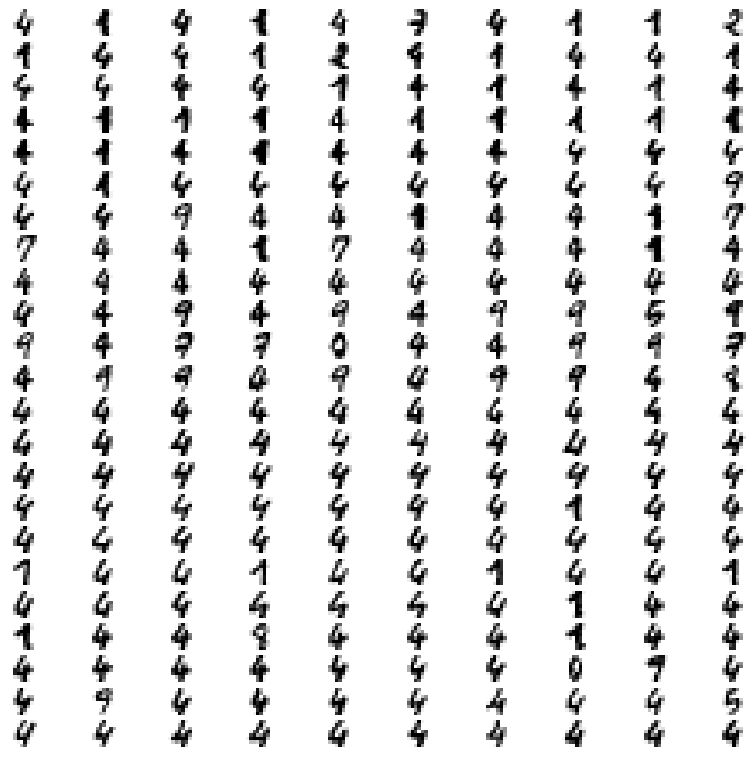

Clúster 3
202 elementos


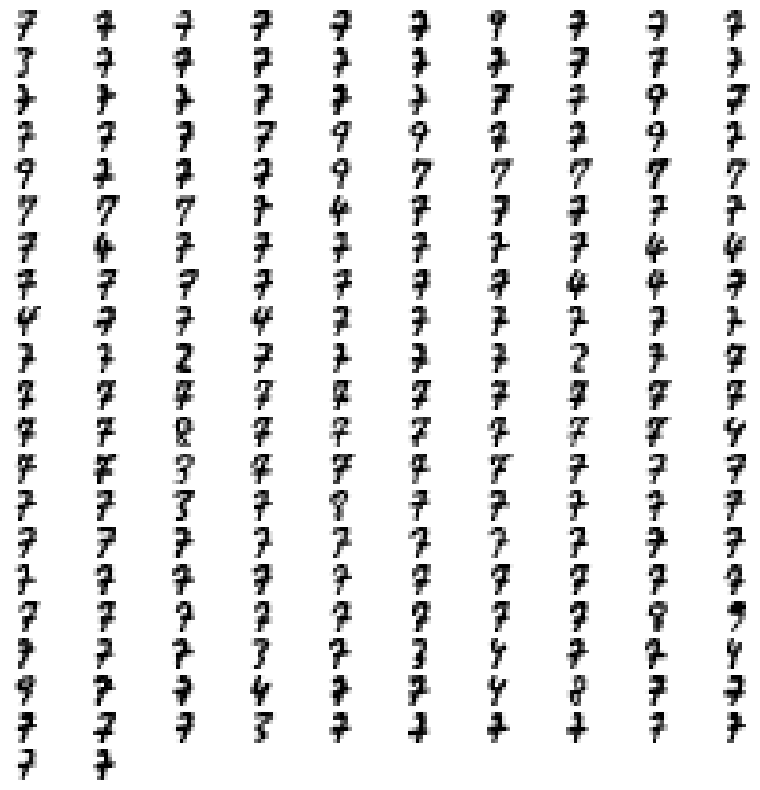

Clúster 4
178 elementos


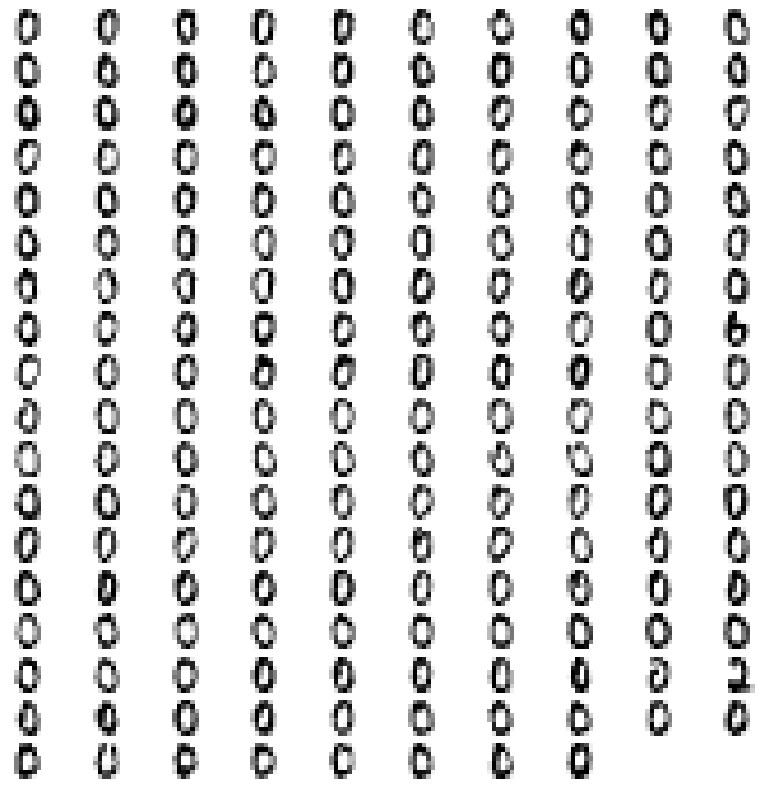

Clúster 5
177 elementos


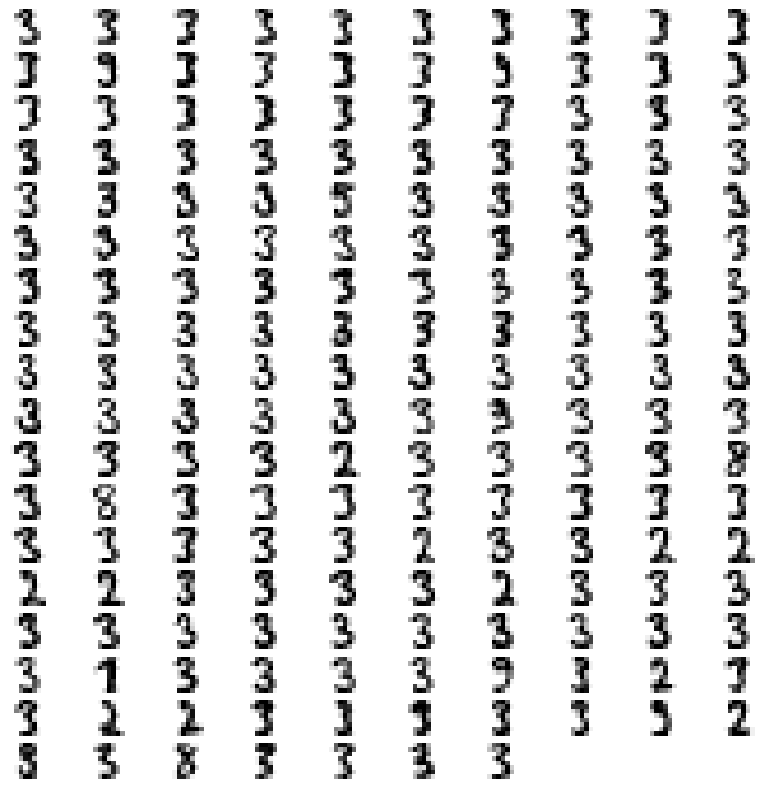

Clúster 6
29 elementos


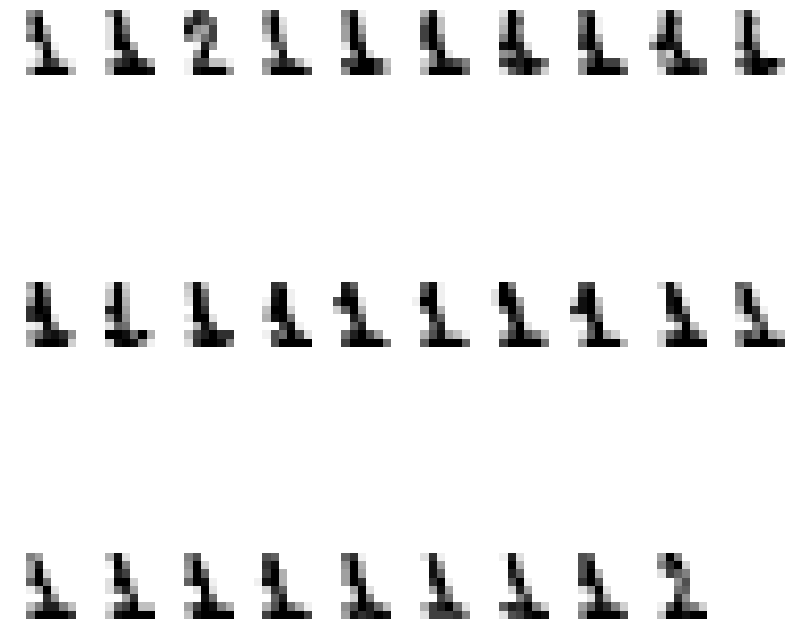

Clúster 7
150 elementos


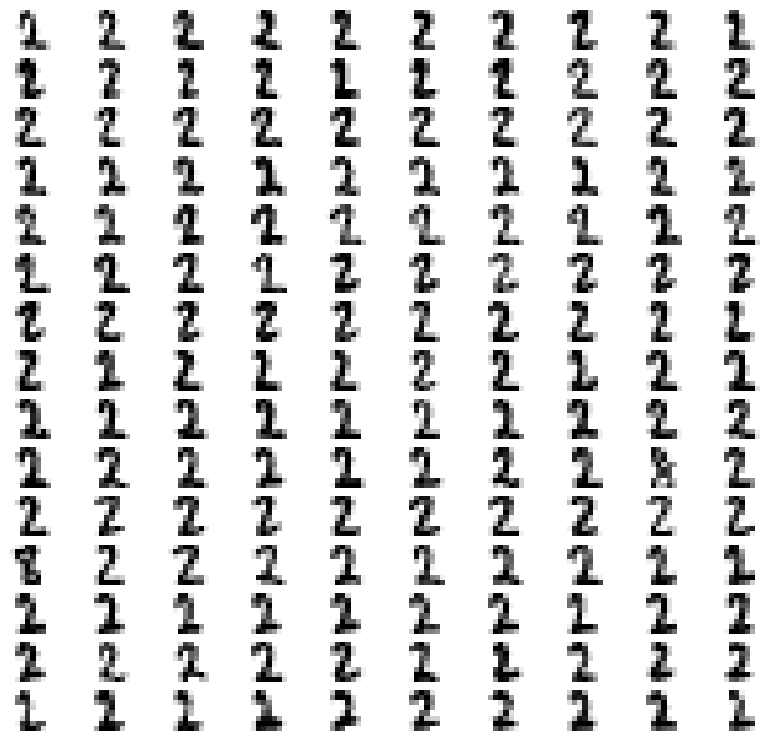

Clúster 8
152 elementos


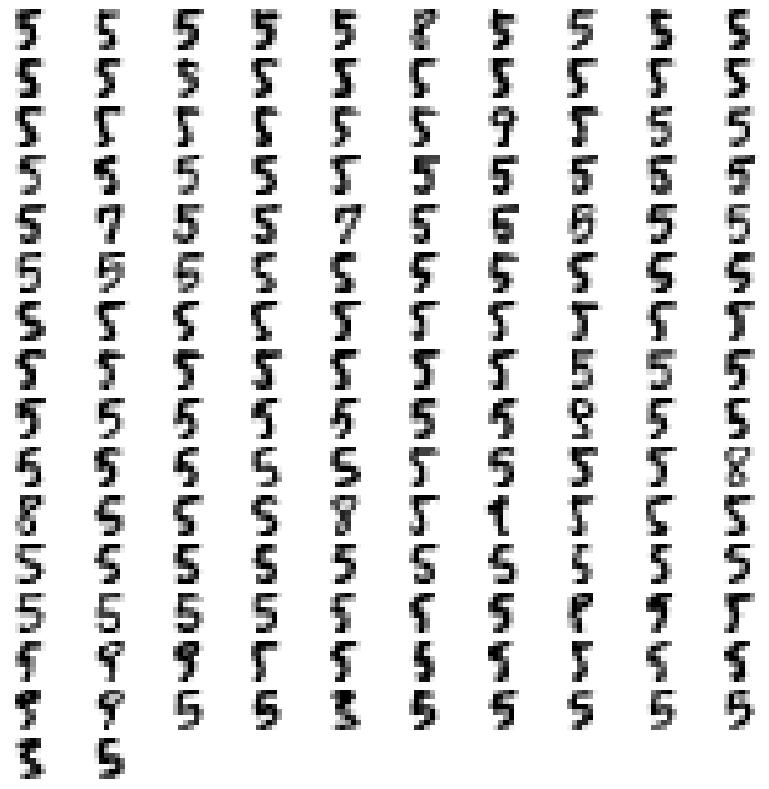

Clúster 9
239 elementos


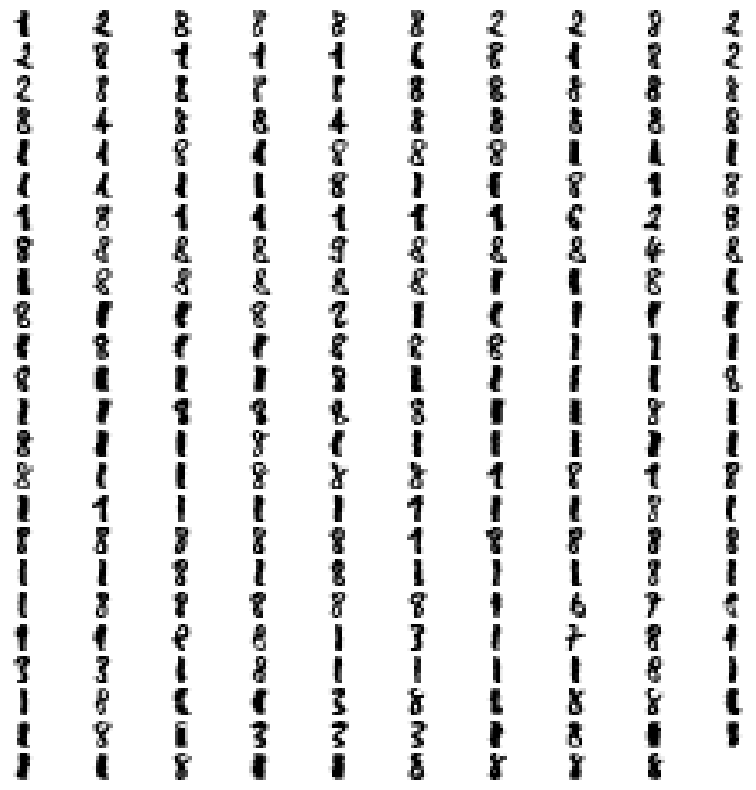

In [91]:
import matplotlib.pyplot as plt
# Inicializa el arreglo de etiquetas Z
Z = np.empty(data.shape[0], dtype=int)

for j in range(data.shape[0]):
    for l in range(10):
        if any(np.array_equal(data[j], punto) for punto in clusters_dig[l]):
            Z[j] = l
            break

# Ahora que tienes las etiquetas Z, puedes visualizar los clústeres
n_clusters = 10  # Número de clústeres

for i in range(n_clusters):
    fila = np.where(Z == i)[0]  # Filas en Z donde están las imágenes de cada clúster
    num = fila.shape[0]  # Número de imágenes en cada clúster
    r = int(np.floor(num / 10.))  # Convertir r a entero

    print("Clúster " + str(i))
    print(str(num) + " elementos")

    plt.figure(figsize=(10, 10))
    for k in range(0, num):
        plt.subplot(r + 1, 10, k + 1)
        imagen = data[fila[k]].reshape(8, 8)  # Reshape de la imagen
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()



# Reducción de tamaño

In [97]:
# Cargamos la imagen
# Especifica la ruta de la imagen que deseas leer
ruta_imagen = 'holi.jpg'

# Utiliza la función cv2.imread() para cargar la imagen
imagen = cv2.imread(ruta_imagen)


# Obtener las dimensiones de la imagen
h, w, _ = imagen.shape

# Preparar los datos para K-Means
B = imagen[:, :, 0].reshape(-1, 1)
G = imagen[:, :, 1].reshape(-1, 1)
R = imagen[:, :, 2].reshape(-1, 1)
X = np.concatenate((R, G, B), axis=1)

# Imprimir el número de píxeles
num_pixels = w * h
print('Número de pixels  =', num_pixels)

Número de pixels  = 5600


In [98]:
# Aplicamos K-means
K = 30
centros, cluster = KMeans(X, K, 10)

In [99]:
# Recuperamos la nueva imagen
for j in range(K):
  # Valor p
  p = centros[j]

  # Crear una matriz resultante que tenga la misma forma que B
  resultante = np.copy(X)
  lista = cluster[j]

  # Iterar a través de los elementos de A
  for i in range(len(lista)):
      elemento_A = lista[i]

      # Verificar si el elemento de A está en B
      coincidencias = np.all(X == elemento_A, axis=1)

      if np.any(coincidencias):
          # Obtener los índices de las coincidencias
          indices_coincidencias = np.where(coincidencias)[0]

          # Reemplazar los elementos en B por p
          for idx in indices_coincidencias:
              resultante[idx, :] = p
  X = np.copy(resultante)
# Crear un objeto de imagen RGB vacío con las dimensiones deseadas
imagen = Image.new("RGB", (w, h))

# Llenar la imagen con los píxeles de la matriz
imagen_array = np.array(imagen)
for fila in range(min(w * h, len(X))):
    pixel = tuple(X[fila])
    x, y = fila % w, fila // w
    imagen_array[y, x] = pixel

# Crear una imagen PIL a partir del arreglo de píxeles
imagen = Image.fromarray(imagen_array, "RGB")

# Mostrar la imagen o guardarla en un archivo
imagen.show()
imagen.save("reducido.png")

# Segmentación de imagenes


In [5]:
# Cargamos la imagen y la convertimos BN
I = Image.open("Cerebro.jpeg")
I1 = I.convert('L')
I2 = np.asarray(I1,dtype=np.float)
h, w = I.size
# La convertimos para ponerla en la funcion k-means
X = I2.reshape((-1, 1))

<ipython-input-5-38c6495573e2>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I2 = np.asarray(I1,dtype=np.float)


In [3]:
# Aplicamos K-means
K = 3
centros, cluster = KMeans(X, K, 10)

In [6]:
# Recuperamos la nueva imagen
for j in range(K):
  # Valor p
  p = centros[j]

  # Crear una matriz resultante que tenga la misma forma que B
  resultante = np.copy(X)
  lista = cluster[j]

  # Iterar a través de los elementos de A
  for i in range(len(lista)):
      elemento_A = lista[i]

      # Verificar si el elemento de A está en B
      coincidencias = np.all(X == elemento_A, axis=1)

      if np.any(coincidencias):
          # Obtener los índices de las coincidencias
          indices_coincidencias = np.where(coincidencias)[0]

          # Reemplazar los elementos en B por p
          for idx in indices_coincidencias:
              resultante[idx, :] = p
  X = np.copy(resultante)
# Crear un objeto de imagen RGB vacío con las dimensiones deseadas
imagen = Image.new("RGB", (w, h))

# Llenar la imagen con los píxeles de la matriz
imagen_array = np.array(imagen)
for fila in range(min(w * h, len(X))):
    pixel = tuple(X[fila])
    x, y = fila % w, fila // w
    imagen_array[y, x] = pixel

# Crear una imagen PIL a partir del arreglo de píxeles
imagen = Image.fromarray(imagen_array, "RGB")

# Mostrar la imagen o guardarla en un archivo
imagen.show()
imagen.save("Cerebro_segmentado.png")